In [ ]:
# Machine learning - Regresión Lineal Simple

# Podemos utilizar regresión lineal para predecir un
# valor continuo como, por ejemplo, Emisión de Co2 de un automovil, utilizando otras variables.

# La regresión lineal es la aproximación de un modelo lineal que se utiliza para describir la relación
# entre dos o más variables. En la regresión lineal simple, hay dos
# variables: una variable dependiente y una variable independiente.
# El punto clave en la regresión lineal es que nuestro valor dependiente debe ser continuo
# y no puede ser un valor discreto. Sin embargo, las variables independientes pueden ser
# medidas en una escala de medida categórica o continua.
# Existen dos tipos de modelos de regresión lineal. Son: regresión simple y regresión múltiple.

In [ ]:
# La línea de ajuste se muestra tradicionalmente como un polinomio. En un problema de regresión simple (un solo x),
# la forma del modelo sería la [y = θ0 + θ1 x1]. En esta ecuación, y ̂ es la variable dependiente
# o el valor pronosticado, x1 es la variable independiente; los parámetros 0 y 1 son los parámetros de
# la línea que debemos ajustar. θ1 es conocida como el "pendiente" o "gradiente"

In [ ]:
# Para predecir la emisión de Co2, devolverá y ̂ = 340.
# Ahora, si comparamos el valor real de la emisión del coche con lo que predijimos
# Utilizando nuestro modelo, descubrirá que tenemos un error de 90 unidades.
# Esto significa que nuestra línea de predicción no es precisa. Este error también se denomina error residual.
# Por lo tanto, podemos decir que el error es la distancia desde el punto de datos hasta la línea de regresión ajustada.
# La media de todos los errores residuales muestra lo mal que encaja la línea con todo el conjunto de datos.

In [ ]:
# Vamos a decirlo más técnicamente. El objetivo de la regresión lineal es minimizar
# la ecuación de MSE, y para minimizarla, deberíamos encontrar los mejores parámetros, para θ0 y θ1.
# Ahora, la pregunta es, ¿cómo encontrar θ0 y θ1 de tal manera que se minimiza este error?

In [ ]:
# Evaluación del Modelo en Modelos de Regresión

# El objetivo de la regresión es crear un modelo para predecir con precisión un caso desconocido.
# Con este fin, tenemos que realizar una evaluación de regresión después de crear el modelo.

In [ ]:
# Introduciremos y discutiremos dos tipos de enfoques de evaluación que puedan
# ser utilizado para lograr este objetivo.
# Estos enfoques son: el entrenamiento y la prueba en el mismo dataset, y la división de tren/prueba.

# Una de las soluciones consiste en seleccionar una parte de nuestro dataset para la realización de pruebas.
# Por ejemplo, supongamos que tenemos 10 registros en nuestro dataset.
# Usamos todo el dataset para el entrenamiento, y construimos un modelo usando este conjunto de entrenamiento.
# Ahora, seleccionamos una pequeña porción del dataset, tales como los números de fila 6 a 9, pero sin el
# etiquetas.
# Este conjunto, se denomina un conjunto de pruebas, que tiene las etiquetas, pero las etiquetas no son utilizadas para
# la predicción, y se utiliza sólo como ground truth.

In [ ]:
# (Training Accuracy)

# Hemos dicho que la formación y las pruebas en el mismo dataset produce una alta precisión de formación
# (Training accuracy),
# pero ¿qué es exactamente la "precisión de formación"?
# La precisión de la formación es el porcentaje de predicciones correctas que hace el modelo cuando se utiliza
# el dataset de prueba
# Sin embargo, una alta precisión en la formación no es necesariamente algo bueno.
# Por ejemplo, tener una alta precisión de formación puede dar como resultado 
# un 'sobreajuste (over fitting)' de los datos. si el modelo esta demasiado entrenado en el dataframe
# puede capturar ruido y generar un modelo no generalizado

In [1]:
# Out- of - Sample Acurracy

# La precisión fuera de la muestra es el porcentaje de las predicciones correctas en las que el modelo realiza
# sobre datos en los que NO ha sido formado el modelo.
# Hacer un "formación y prueba" en el mismo dataset probablemente tendrá una precisión baja fuera de la muestra
# debido a la probabilidad de estar en sobreajuste.
# Es importante que nuestros modelos tengan una precisión alta, fuera de la muestra, porque el propósito
# de nuestro modelo es, por supuesto, hacer predicciones correctas sobre datos desconocidos.
# Una forma consiste en utilizar otro enfoque de evaluación denominado "Train/Test Split".

In [ ]:
# El problema con la train/test split es que es altamente dependiente de los dataset en los que
# los datos fueron formados y probados.
# La variación de esto hace que el train/test split tenga una mejor predicción fuera de la muestra
# que formando y probando en el mismo dataset, pero aún tiene algunos problemas debido a esta
# dependencia.

In [ ]:
# Otro modelo de evaluación, denominado "k-fold cross-validation", soluciona la mayoría de estos problemas.

In [ ]:
# "k-fold cross-validation"

# ¿Cómo se arregla una alta variación que resulta de una dependencia?
# Bueno, lo promedias.
# Permítanme explicar el concepto básico de "k-fold cross-validation" para ver cómo podemos resolver
# este problema.

# K-fold cross-validation, en su forma más sencilla, realiza multiples train/test splits utilizando
# el mismo dataset en el que cada división es distinta.
# Entonces, el resultado es promediado para producir una precisión más consistente fuera de la muestra.

In [ ]:
# Laboratorio 1: Regresión Lineal Simple

In [ ]:

# En este laboratorio, aprenderemos a utilizar la librería scikit-learn para 
# implementar la Regresión Lineal Simple. Descargaremos un conjunto de datos 
# relacionados con el consumo de combustible y las emisiones de dióxido de carbono 
# de los autos. Después, dividiremos nuestros datos en conjuntos de capacitación y de prueba, 
# crearemos un modelo usando el conjunto de capacitación, evaluaremos el modelo utilizando 
# el conjunto de prueba y finalmente usaremos el modelo para predecir el valor desconocido. Así que vamos a empezar.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [6]:
data = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
df = pd.read_csv(data)
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [ ]:
# Understanding the Data
# FuelConsumption.csv:
# Hemos descargado el dataset de consumo de combustible, FuelConsumption.csv, el cual contiene ratings específicos al consumo de combustible y emisiones de dióxido de carbono para aquellos vehículos ligeros en la venta minorista dentro de Canadá. Dataset source

# MODELYEAR e.g. 2014
# MAKE e.g. Acura
# MODEL e.g. ILX
# VEHICLE CLASS e.g. SUV
# ENGINE SIZE e.g. 4.7
# CYLINDERS e.g 6
# TRANSMISSION e.g. A6
# FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
# FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
# FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
# CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [7]:
# Exploración de Datos
# Tengamos primero una exploración descriptiva de nuestros datos.
# Sumarizar los datos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
# Seleccionemos algunas características para explorar más en detalle.
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


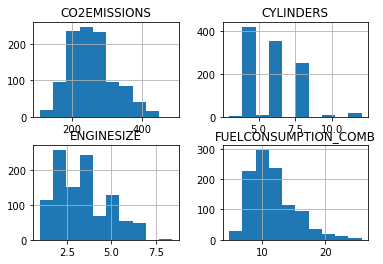

In [9]:
# podemos dibujar cada una de estas características:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

In [ ]:
# Ahora, comparemos estas características anteriores con la 
# emisión de carbono, para ver cuán lineal es la regresión:

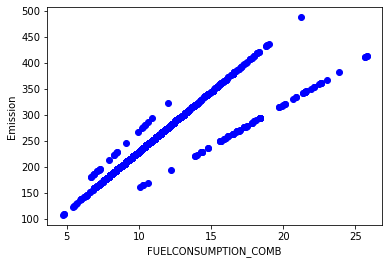

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

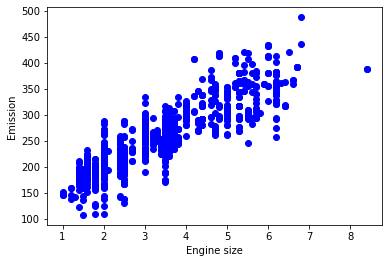

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

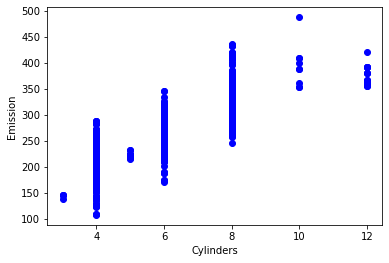

In [12]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()


In [13]:
#### Creando el set de datos de entrenamiento y de el prueba

# Train/Test Split divide el dataseet en uno de entrenamiento y otro de pruebas, 
# siendo excluyentes. Después de ello, entrenas con el set de entrenamiento 
# y pruebas con el de prueba. 

# Esto brinda una evaluación más exacta porque el set de entrenamiento no es 
# parte de un set de datos que se usaron para entrenar datos. Refleja un escenario 
# más real basado en problemas más actuales.

# Esto significa que sabemos la salida de cada punto de datos del set, siendo 
# un escenario ideal ! Y como estos datos no se usaron para entrenar el modelo, 
# el modelo no sabe la salida de estos puntos de datos. Asi que, básicamente, 
# es una real prueba fuera de muestra.


In [14]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [ ]:
# Modelo de Regresión Simple
# La Regresión Lineal cuadra con un modelo lineal de coeficientes B = (B1, ..., Bn) 
# para minimizar la 'suma residual de cuadrados' entre la x independiente del dataset 
# y la dependiente y por la aproximación lineal.

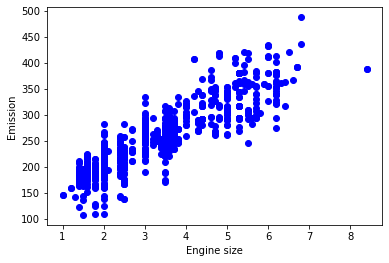

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [ ]:
# Modeling
# Usando el paquete sklearn para modelar datos.

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[40.43193725]]
Intercept:  [121.41687356]


In [ ]:
# Como se mencionó antes, As mentioned before, Coeficiente e Intercepción en la regresión lineal simple, 
# son los parámetros de la recta de ajuste. Dado que es una regresión lineal simple, con 2 parámetros 
# solamente, y sabiendo que los parámetros son la intersección y pendiente de la linea, 
# sklearn puede estimarlas directamente a partir de los datos. 
# Tener en cuenta que todos los datos deben estar disponibles para poder calcular los parámetros.

In [ ]:
# Trazar las salidas
# podemos marcar la recta de ajuste sobre los datos:

Text(0, 0.5, 'Emission')

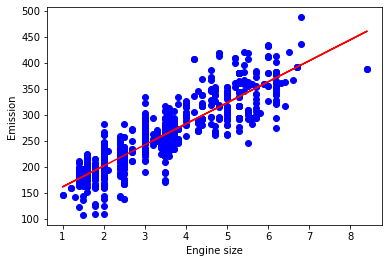

In [20]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
# Evaluación
# comparamos los valores actuales y predichos para calcular la exactitud del modelo de regresión. 
# Las métricas de la evaluación proveen un role principal en el desarrollo de un modelo, ya que provee 
# conocimiento profundo en areas que necesitan mejoras.

# Existen distintas métricas de evaluación de modelos, utilicemos MSE para calcular 
# la exactitud de nuestro modelo basado en el set de prueba:

# - Error absoluto de media: Es una media del valor absoluto de los errores. 
#     Es la métrica más fácil de comprender ya que simplemente es el promedio de los errores.
# - Error Cuadrado Medio (MSE): El Error Cuadrado Medio (MSE) es la media del error cuadrático.
#     Es más popular que el error de Media absoluto porque hace foco en grandes errores. 
#     Esto se debe a que el término cuadrático tiene errores más grandes que van creciendo en comparación con más pequeños.
# - Error Cuadrático Medio (RMSE).
# - R-cuadrática no es un error, sino que es una medida popular para 
#     darle precisión a nuestro modelo. Representa cuán cerca están los datos de la 
#      linea de regresión ajustada. Mientras más alto el R-cuadrático, mejor se encontrará ajustado 
#      el modelo respecto de los datos. El puntaje mejor posible es 1.0 y puede tomar valores negativos 
#      (porque el modelo puede ser arbitrariamente peor).

In [21]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Error medio absoluto: 24.38
Suma residual de los cuadrados (MSE): 1023.47
R2-score: 0.69
